---
author: Juma Shafara
date: "2024-08-12"
title: Softmax Classifer 1D
keywords: [Training Two Parameter, Mini-Batch Gradient Decent, Training Two Parameter Mini-Batch Gradient Decent]
description: How to create complex Neural Network in pytorch.
---

![Photo by DATAIDEA](../../assets/banner4.png)

<h2>Objective</h2><ul class="cursored-list"><li><i class="bi bi-cursor"></i> How to create complex Neural Network in pytorch.</li></ul> 


<h2>Table of Contents</h2>

<ul class="cursored-list">
    <li><a href="#Prep"><i class="bi bi-cursor"></i> Preperation</a></li>
    <li><a href="#Data"><i class="bi bi-cursor"></i> Get Our Data</a></li>
    <li><a href="#Train"><i class="bi bi-cursor"></i> Define the Neural Network, Optimizer, and Train the Model</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>


<!-- Newsletter -->
<div class="newsletter">
<div class="newsletter-heading">
<h4><i class="bi bi-info-circle-fill"></i> Don't Miss Any Updates!</h4>
</div>
<div class="newsletter-body">
<p>
Before we continue, I have a humble request, to be among the first to hear about future updates of the course materials, simply enter your email below, follow us on <a href="https://x.com/dataideaorg"><i class="bi bi-twitter-x"></i>
(formally Twitter)</a>, or subscribe to our <a href="https://www.youtube.com/@dataidea-science"><i class="bi bi-youtube"></i> YouTube channel</a>.
</p>
<iframe class="newsletter-frame" src="https://embeds.beehiiv.com/5fc7c425-9c7e-4e08-a514-ad6c22beee74?slim=true" data-test-id="beehiiv-embed" height="52" frameborder="0" scrolling="no">
</iframe>
</div>
</div>

<h2 id="Prep">Preparation</h2>


We'll need to import the following libraries for this lab.


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

Define the plotting functions.


In [2]:
def get_hist(model,data_set):
    activations=model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation layer " + str(i+1))
        plt.xlabel("Activation")
        plt.xlabel("Activation")
        plt.legend()
        plt.show()

In [3]:
def PlotStuff(X,Y,model=None,leg=False):
    
    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neral network ')

    plt.legend()
    plt.show()

<h2 id="Data">Get Our Data</h2>


Define the class to get our dataset.


In [4]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.linspace(-20, 20, 100).view(-1,1)
  
        self.y=torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10)& (self.x[:,0]<-5)]=1
        self.y[(self.x[:,0]>5)& (self.x[:,0]<10)]=1
        self.y=self.y.view(-1,1)
        self.len=self.x.shape[0]
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len



<h2 id="Train">Define the Neural Network, Optimizer and Train the Model</h2>


Define the class for creating our model.


In [5]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=torch.sigmoid(self.linear2(x))
        return x

Create the function to train our model, which accumulate lost for each iteration to obtain the cost.


In [6]:
def train(data_set,model,criterion, train_loader, optimizer, epochs=5,plot_number=10):
    cost=[]
    
    for epoch in range(epochs):
        total=0
        
        for x,y in train_loader:
            optimizer.zero_grad()
            
            yhat=model(x)
            loss=criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total+=loss.item()
            
        if epoch%plot_number==0:
            PlotStuff(data_set.x,data_set.y,model)
        
        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

In [7]:
data_set=Data()

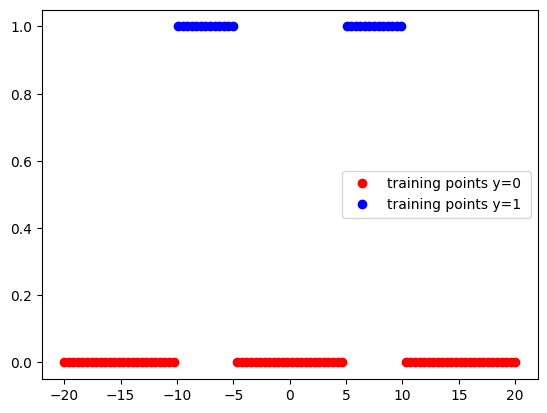

In [8]:
PlotStuff(data_set.x,data_set.y,leg=False)

Create our model with 9
neurons in the hidden layer. And then create a BCE loss and an Adam optimizer.


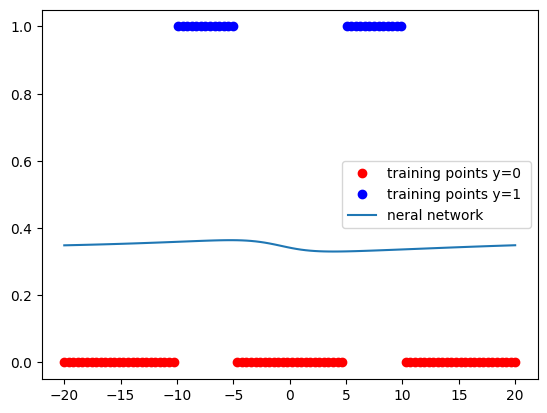

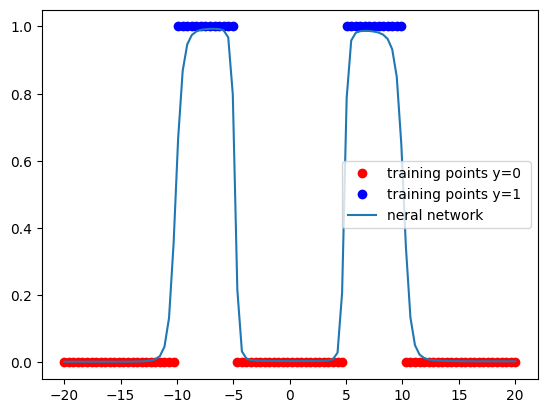

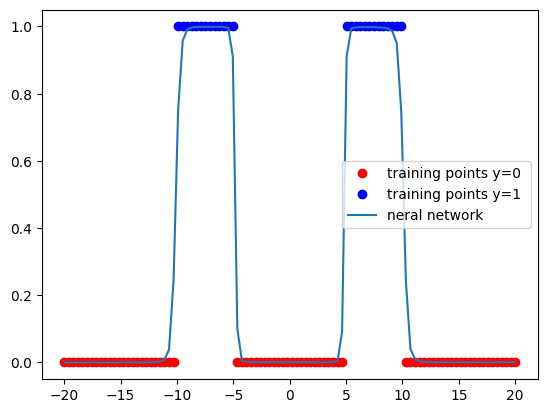

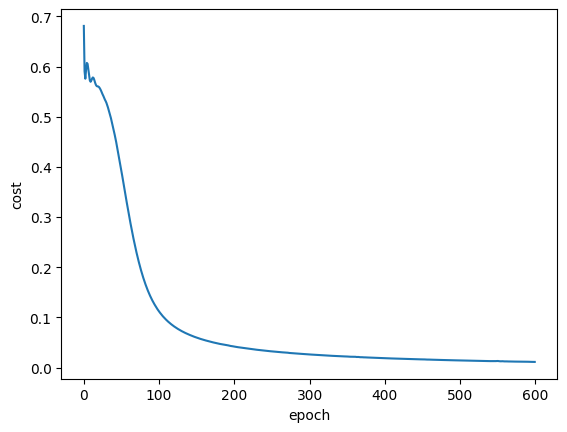

In [9]:
torch.manual_seed(0)
model=Net(1,9,1)
learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=100)
COST=train(data_set,model,criterion, train_loader, optimizer, epochs=600,plot_number=200)

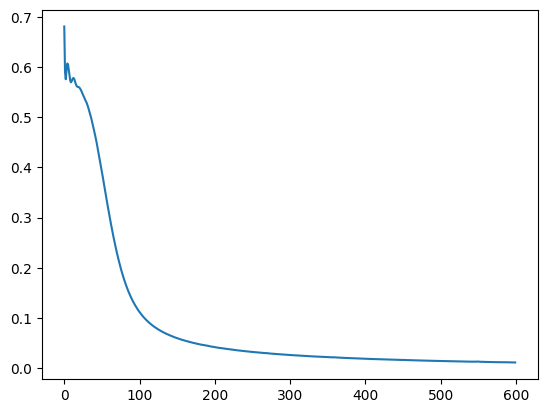

In [10]:
plt.plot(COST)

<h2>What's on your mind? Put it in the comments!</h2>
<script src="https://utteranc.es/client.js"
        repo="dataideaorg/dataidea-science"
        issue-term="pathname"
        theme="github-light"
        crossorigin="anonymous"
        async>
</script>